## NeuroWorkshop

### Object Detection и Segmentation

[Дмитрий Сошников](http://fb.com/shwars), Microsoft

![Image Algorithms](https://cdn-images-1.medium.com/max/840/1*Hz6t-tokG1niaUfmcysusw.jpeg)

## Наивный подход к обнаружению изображения

* Разбиваем изображение на части
* Начинаем проходить обученной на классификацию CNN по всем фрагментам изображения
* Выбираем фрагмент с максимальной вероятностью

In [18]:
import sys
!{sys.executable} -m pip install opencv-python

In [20]:
!{sys.executable} -m pip install --upgrade keras

    100% |████████████████████████████████| 317kB 3.9MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 3.8MB/s eta 0:00:01
  Found existing installation: Keras-Preprocessing 1.0.2
    Uninstalling Keras-Preprocessing-1.0.2:
      Successfully uninstalled Keras-Preprocessing-1.0.2
  Found existing installation: Keras-Applications 1.0.4
    Uninstalling Keras-Applications-1.0.4:
      Successfully uninstalled Keras-Applications-1.0.4
  Found existing installation: Keras 2.2.2
    Uninstalling Keras-2.2.2:
      Successfully uninstalled Keras-2.2.2


In [13]:
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Girl_and_cat.jpg/1200px-Girl_and_cat.jpg

--2018-11-30 15:29:18--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Girl_and_cat.jpg/1200px-Girl_and_cat.jpg
Resolving webproxy (webproxy)... 10.36.1.1
Connecting to webproxy (webproxy)|10.36.1.1|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 123552 (121K) [image/jpeg]
Saving to: ‘1200px-Girl_and_cat.jpg’

1200px-Girl_and_cat 100%[===================>] 120.66K  --.-KB/s    in 0.1s    

2018-11-30 15:29:19 (874 KB/s) - ‘1200px-Girl_and_cat.jpg’ saved [123552/123552]



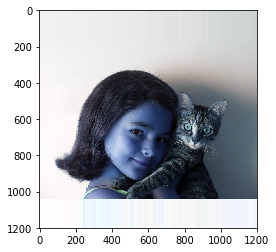

In [6]:
img = cv2.imread('1200px-Girl_and_cat.jpg')
img = np.pad(img,((158,158),(0,0),(0,0)),mode='edge')
plt.imshow(img)

In [22]:
if not os.path.isfile('cat_detector.h5'):
    !wget https://github.com/shwars/NeuroWorkshop/raw/master/Models/cat_detector.h5
det = keras.models.load_model('cat_detector.h5')

--2018-11-30 17:14:13--  https://github.com/shwars/NeuroWorkshop/raw/master/Models/cat_detector.h5
Resolving webproxy (webproxy)... 10.36.1.1
Connecting to webproxy (webproxy)|10.36.1.1|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Models/cat_detector.h5 [following]
--2018-11-30 17:14:13--  https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Models/cat_detector.h5
Connecting to webproxy (webproxy)|10.36.1.1|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 3928656 (3.7M) [application/octet-stream]
Saving to: ‘cat_detector.h5’

cat_detector.h5     100%[===================>]   3.75M  2.04MB/s    in 1.8s    

2018-11-30 17:14:16 (2.04 MB/s) - ‘cat_detector.h5’ saved [3928656/3928656]



ValueError: Unknown layer:name

In [8]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## Подходы к Object Detection

* Region Proposal Networks (R-CNN, Fast R-CNN, Faster R-CNN)
* One-pass (YOLO, RetinaNet)
